# Nautliz: Color Analysis Examples
* __Parametric Difference Equation imaging methods__ _in the context of the Escape Time Algorithm_
    * grayscale
    * map directly to HSV
    * color-map to RGB
    
#### Equation Definition Code:

In [1]:
""" get the external code files"""
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

""" known parameter sets (names keyed to original .tif ouput headers) """
tsty_64 = [1.475666184256, 0.367917668899+0.602844469364j]
tsty_24 = [1.597031082454, 0.360789747568+0.080370815437j]
tsty_26 = [1.667197871723, 1.213225532718+0.060523992844j]
tsty_39 = [3.806521859111, 1.369211764065-0.416877331718j]
tsty_47 = [1.670976417267, 0.154249914159+0.202264076000j]
tsty_53 = [2.792422080721, 1.227827869496+0.063564967216j]
tsty_57 = [3.996321579045, 1.462499741353-0.236212926858j]
tsty_76 = [0.904750719011, 1.318553516061+0.653081113760j]
tsty_77 = [1.538476497478, 0.062179479416+0.735873378982j]
tsty_84 = [3.930653598888, 1.239491637210-0.125660967153j]
""" define the equation """
def Nautuliz(Z, p, Z0=None, ET=None):
    """ 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Z = Z**(-p[0]**(-Z**(-p[1]))) - p[0]**(-Z**(p[1]));
    return Z

In [2]:
# MATLAB equivalent
#     for n = 1:nc
#         Z = Z^(-1^n*exp(Z*c(n)));
#     end

Z = 1 + 1j
print(Z)
p = tsty_39
Z = Nautuliz(Z, p)
print(Z)
# MATLAB:
#0.0207 - 0.3581i

(1+1j)
(0.9822902453184454-0.47118894026412383j)


# Products of Escape Time Algorithm
* ET, Z, Z0 = get_primitives( [ (function-name, function-parameters ) ], complex_plane_definition)
    * Z0  = initial complex vector at each point (on the complex plane == the input image)
    * ET  = Escape Time at each point
    * Z   = final complex vector at each point

In [3]:
""" Define a complex plane point for each pixel """
par_set = {'n_rows': 300, 'n_cols': 500}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = 0 # 
par_set['zoom'] = 1/3

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

""" Define the function handle and numerical parameter set """
list_tuple = [(Nautuliz, (tsty_53))]
t0 = time.time()

""" Get the primitive products of the calculation """
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t calculate primitives total time')

3.268203020095825 	 calculate primitives total time


# Normalized number planes for use as image color values
* Zd, Zr, ETn = etg_norm(Z0, Z, ET)
    * Zd  = distance at ET
    * Zr  = rotation at ET
    * ETn = ET

In [4]:
""" Normalize """
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print(time.time() - t0, '\t normalize primitives to color values')

0.34614992141723633 	 normalize primitives to color values


# Grayscale
* D = mat_to_gray(Zd, max_v=255, min_v=64)
    * normalized number plane
    * (optional) grascale parameters

0.9622950553894043 	 grayscale converstion time


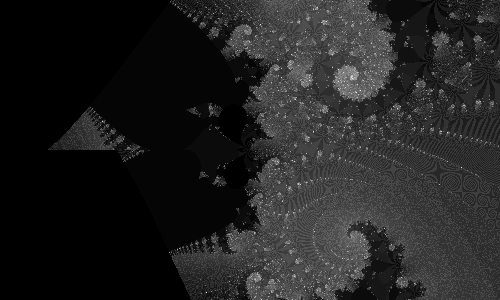

In [5]:
""" Number of iterations for each Vector at Escape Time as a full range grayscale  """
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print(time.time() - t0, '\t grayscale converstion time')
display(ETd)

0.9994940757751465 	 grayscale converstion time


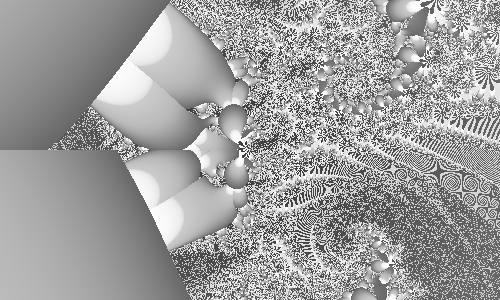

In [6]:
""" Vector Distance at Escape Time as a full range grayscale  """
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(D)

0.9781010150909424 	 grayscale converstion time


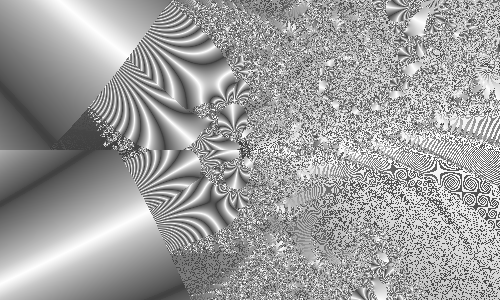

In [7]:
""" Vector Rotation at Escape Time as a full range grayscale  """
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(R)

# Hue Saturation Value: HSV direct
* Ihsv = rgb_2_hsv_mat(H, S, V)
    * H = ncp.range_norm(Zr - Zd, lo=0.5, hi=0.85)
    * S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.9)
    * V = ncp.range_norm(ETn, lo=0.0, hi=1.0)

1.829521894454956 	 HSV converstion time


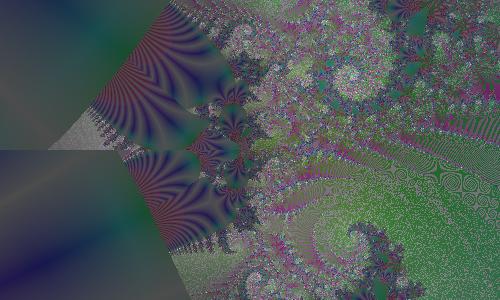

In [8]:
""" number one of two functions 
    (both examples using Distance, Rotation and ET as H,S,V) """
t0 = time.time()
H = ncp.range_norm(Zd_sm, lo=0.25, hi=0.95)
S = ncp.range_norm(Zr_sm, lo=0.0, hi=0.7)
V = ncp.range_norm(ETn_sm, lo=0.3, hi=1.0)
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print(time.time() - t0, '\t HSV converstion time')
display(Ihsv)

2.0238780975341797 	 HSV converstion time


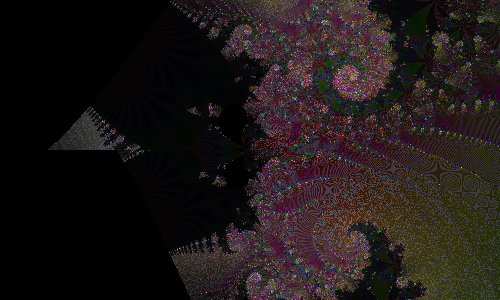

In [9]:
""" number 2 of two functions
    (using using Distance, Rotation and ET as full range H, S, V) """
t0 = time.time()
H2 = ncp.range_norm(Zd_sm)
S2 = ncp.range_norm(Zr_sm)
V2 = ncp.range_norm(ETn_sm)
I_hsv2 = ncp.normat_hsv_intrgb(H2, S2, V2, H_max=1.0, H_min=0.0, S_max=1.0, S_min=0.0, V_max=1.0, V_min=0.0)
print(time.time() - t0, '\t HSV converstion time')
display(I_hsv2)

# Color-mapped
* I_mapped = mat_to_mapped(Zd, mp)
    * Zd converted to index of unique values
    * mp will be resized to number of unique values in Zd

0.7487449645996094 	 HSV converstion time


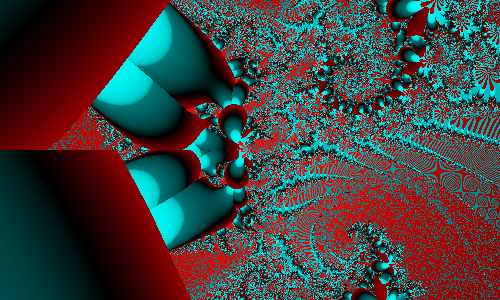

In [10]:
""" Color map example: Red to Black to Blue-Green """
t0 = time.time()
mp = np.array([[1.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 1.0, 1.0]])
I_rgb = ncp.mat_to_mapped(Zd_sm, mp)
print(time.time() - t0, '\t HSV converstion time')
display(I_rgb)

## Interesting numerical factoid section:

ET =	 2


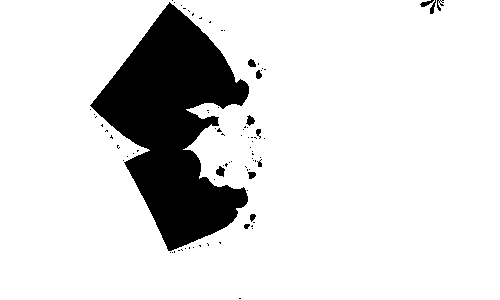

ET =	 3


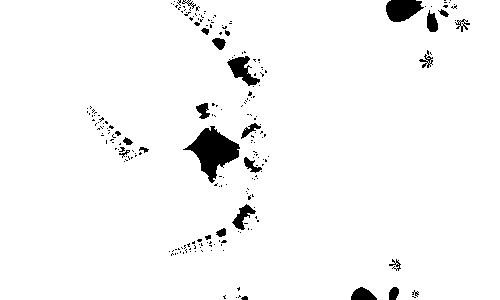

ET =	 4


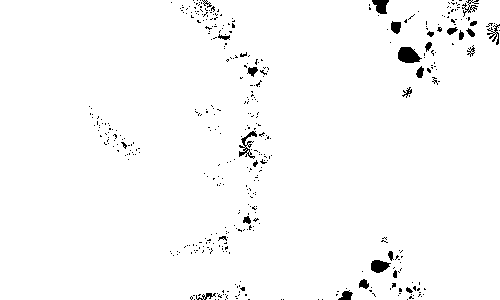

ET =	 5


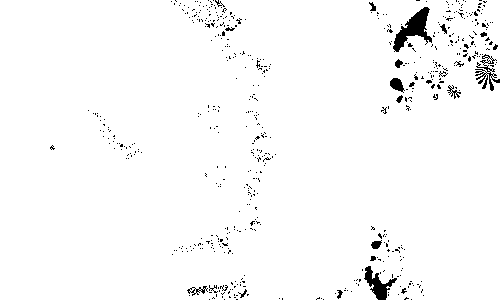

ET =	 6


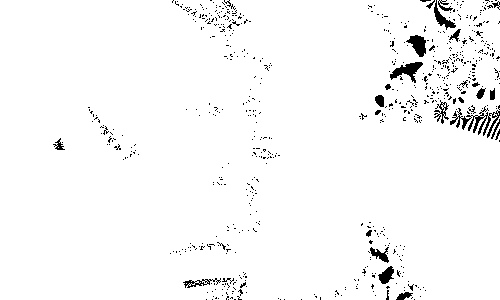

ET =	 7


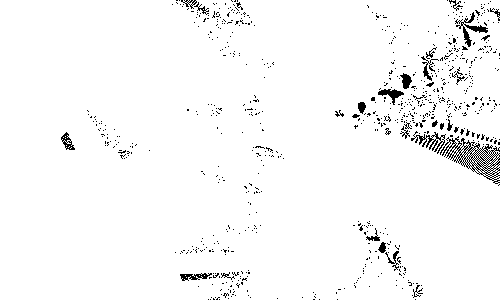

ET >	 8


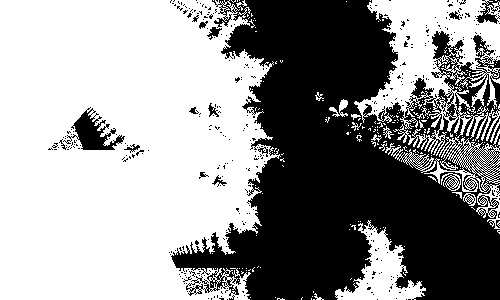

In [11]:
"""  Time-Point of Escape individual escape time points for each escape time
     Animations possible  """
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [12]:
"""  number of points escaped at each iteration: escape time frequency  """
Total_Points = ET_sm.shape[0] * ET_sm.shape[1]
print('\t\t%i remain in orbit after %i iterations\n'%((ET_sm > (ET_sm.max()-1)).sum(),  ET_sm.max()))
print('%3s) %10s\n'%('ET', 'Escaped'))
t_esc = 0
for k in range(1,int(ET_sm.max())):
    print('%3i) %7i'%(k, (ET_sm == k).sum()))
    t_esc += (ET_sm == k).sum()

print('\n(in)Sanity check:\n%i Total points\n%i Escaped\n%i Remain'%(Total_Points, t_esc, Total_Points - t_esc))

		1 remain in orbit after 48 iterations

 ET)    Escaped

  1)   41861
  2)   20520
  3)    5036
  4)    3045
  5)    3610
  6)    4307
  7)    4527
  8)    4831
  9)    6737
 10)    7734
 11)    7921
 12)    7817
 13)    6624
 14)    5867
 15)    5471
 16)    4275
 17)    2720
 18)    1710
 19)    1186
 20)     909
 21)     666
 22)     531
 23)     441
 24)     384
 25)     318
 26)     229
 27)     180
 28)     135
 29)      94
 30)      70
 31)      67
 32)      34
 33)      34
 34)      28
 35)      21
 36)      18
 37)      10
 38)       9
 39)       4
 40)       6
 41)       3
 42)       3
 43)       3
 44)       2
 45)       1
 46)       0
 47)       0

(in)Sanity check:
150000 Total points
149999 Escaped
1 Remain


In [13]:
""" partial list of unescaped starting points (look for orbit points) """
Z_overs = Z0_sm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  2.52 28.3 degrees

        1 total unescaped points

   points near V       (plane units)
        1 within V/ 1  (2.516)
        1 within V/ 2  (1.258)
        1 within V/ 3  (0.839)
        1 within V/ 4  (0.629)
        1 within V/ 5  (0.503)
        1 within V/ 6  (0.419)
        1 within V/ 7  (0.359)
        1 within V/ 8  (0.314)
        1 within V/ 9  (0.280)
        1 within V/10  (0.252)
        1 within V/11  (0.229)
